In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [2]:
attrition=pd.read_csv('https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/employee_attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

In [4]:
categorical=attrition[categorical]
attrition_cat = categorical.drop(['Attrition'], axis=1)

In [5]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head().T

,0,1,2,3,4
BusinessTravel_Non-Travel,0,0,0,0,0
BusinessTravel_Travel_Frequently,0,1,0,1,0
BusinessTravel_Travel_Rarely,1,0,1,0,1
Department_Human Resources,0,0,0,0,0
Department_Research & Development,0,1,1,1,1
Department_Sales,1,0,0,0,0
EducationField_Human Resources,0,0,0,0,0
EducationField_Life Sciences,1,1,0,1,0
EducationField_Marketing,0,0,0,0,0
EducationField_Medical,0,0,0,0,1


In [6]:
attrition.Attrition = pd.Categorical(attrition.Attrition)
attrition['Attrition']= attrition.Attrition.cat.codes

<AxesSubplot:xlabel='Attrition', ylabel='count'>

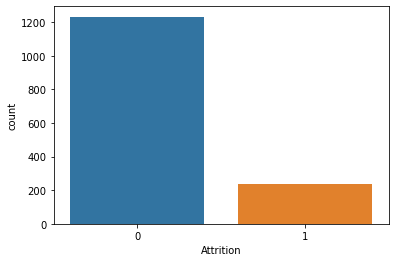

In [7]:
sns.countplot(x="Attrition", data=attrition)

In [8]:
numerical=attrition.select_dtypes(exclude='object').columns
numerical = attrition[numerical]

In [9]:
X = pd.concat([numerical, attrition_cat], axis=1)
y=attrition['Attrition']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [11]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [12]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(smote_train, smote_target)

SVC(C=1, kernel='linear')

In [13]:
from sklearn.metrics import accuracy_score
y_pred= svc.predict(X_test)
print("Accuracy Rate of SVC: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Rate of SVC: 0.95
